In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285 ,
-0.2443 , -0.02445, 0.00135, -0.2006 , 0.07475,
-0.1422 , 0.06515, 0.15265, 0.3521 , 0.28415,
0.5524 , 0.23115, 0.20835, 0.4211, 0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451 , -0.43005, -0.4484 , -0.1475 ,
-0.5019 , -0.28055, 0.24595, -0.21425, -0.0286 ,
0.23415, 0.46575, 0.07955, 0.1973 , 0.0719 ,
0.3639 , 0.5536 , 0.3365 , 0.50705, 0.33435])

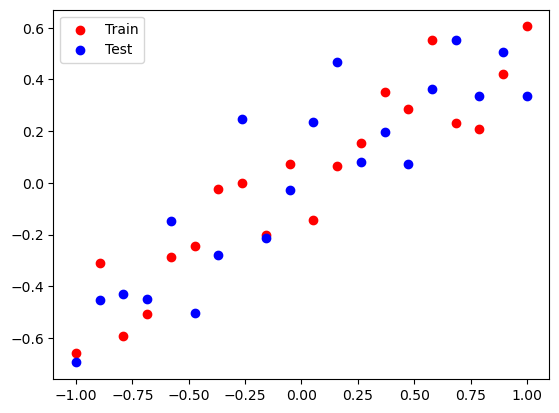

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

In [9]:
history = model_1.fit(X_train, y_train, epochs=500,
validation_data = (X_test, y_test),
verbose=False)

In [10]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004823761992156506, Test: 0.04487796872854233


In [11]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


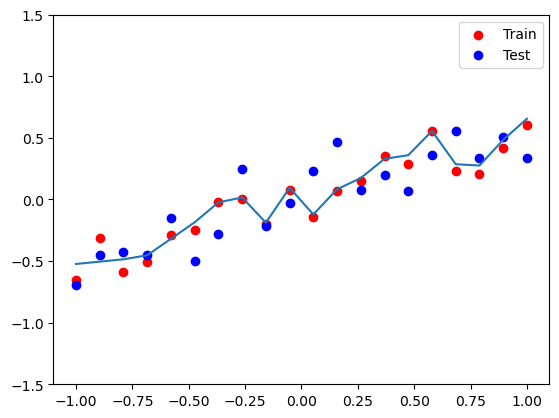

In [12]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [13]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)

In [14]:
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

In [15]:
drop_out_history = model_2.fit(X_train, y_train, epochs=500,
validation_data = (X_test, y_test),
verbose=False)

In [16]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.012312694452702999, Test: 0.038666367530822754


In [17]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


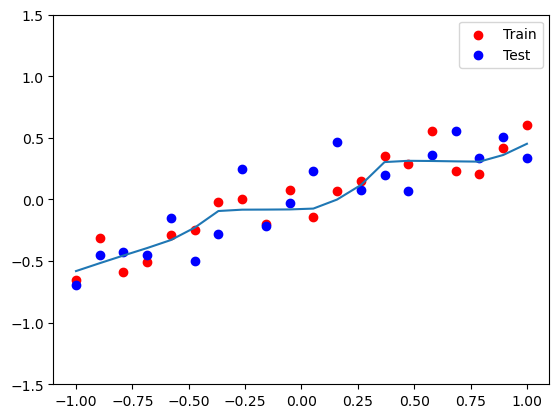

In [18]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [22]:
m1=model_1.get_weights()
m1

[array([[-0.0192641 , -0.25953004,  0.1339796 , -0.05197549, -0.00964744,
          0.06107771, -0.2164218 , -0.01142562, -0.15683421, -0.26879638,
         -0.04681735, -0.03599553, -0.17640501,  0.00947732, -0.0772706 ,
          0.03858127,  0.17713264, -0.03471664,  0.08313437, -0.27225697,
         -0.260467  , -0.13076888, -0.28453302, -0.14568192,  0.01222526,
          0.10589861, -0.16702878,  0.0014801 , -0.16557297,  0.01571561,
          0.0635389 , -0.03630757, -0.03538845,  0.00363487,  0.08104061,
         -0.01635538, -0.19918925,  0.01076578, -0.03526871,  0.0253419 ,
         -0.23179415, -0.23256049,  0.01139038, -0.00744273,  0.02737091,
          0.01267967,  0.01183696,  0.01568997,  0.08353022,  0.03820737,
          0.03024102, -0.12950759,  0.02873857,  0.03673006, -0.00130906,
          0.02127048,  0.08020745,  0.03423233,  0.05428403, -0.01691208,
         -0.05832332, -0.04835773,  0.04042701, -0.04874137, -0.11520377,
          0.03193523, -0.05282534,  0.

In [24]:
m2=model_2.get_weights()
m2

[array([[-0.0192641 , -0.25953004,  0.1339796 , -0.05197549, -0.00964744,
          0.06107771, -0.2164218 , -0.01142562, -0.15683421, -0.26879638,
         -0.04681735, -0.03599553, -0.17640501,  0.00947732, -0.0772706 ,
          0.03858127,  0.17713264, -0.03471664,  0.08313437, -0.27225697,
         -0.260467  , -0.13076888, -0.28453302, -0.14568192,  0.01222526,
          0.10589861, -0.16702878,  0.0014801 , -0.16557297,  0.01571561,
          0.0635389 , -0.03630757, -0.03538845,  0.00363487,  0.08104061,
         -0.01635538, -0.19918925,  0.01076578, -0.03526871,  0.0253419 ,
         -0.23179415, -0.23256049,  0.01139038, -0.00744273,  0.02737091,
          0.01267967,  0.01183696,  0.01568997,  0.08353022,  0.03820737,
          0.03024102, -0.12950759,  0.02873857,  0.03673006, -0.00130906,
          0.02127048,  0.08020745,  0.03423233,  0.05428403, -0.01691208,
         -0.05832332, -0.04835773,  0.04042701, -0.04874137, -0.11520377,
          0.03193523, -0.05282534,  0.

In [27]:
model_1.set_weights(m2)
m12=model_1.get_weights()
m12

[array([[-0.0192641 , -0.25953004,  0.1339796 , -0.05197549, -0.00964744,
          0.06107771, -0.2164218 , -0.01142562, -0.15683421, -0.26879638,
         -0.04681735, -0.03599553, -0.17640501,  0.00947732, -0.0772706 ,
          0.03858127,  0.17713264, -0.03471664,  0.08313437, -0.27225697,
         -0.260467  , -0.13076888, -0.28453302, -0.14568192,  0.01222526,
          0.10589861, -0.16702878,  0.0014801 , -0.16557297,  0.01571561,
          0.0635389 , -0.03630757, -0.03538845,  0.00363487,  0.08104061,
         -0.01635538, -0.19918925,  0.01076578, -0.03526871,  0.0253419 ,
         -0.23179415, -0.23256049,  0.01139038, -0.00744273,  0.02737091,
          0.01267967,  0.01183696,  0.01568997,  0.08353022,  0.03820737,
          0.03024102, -0.12950759,  0.02873857,  0.03673006, -0.00130906,
          0.02127048,  0.08020745,  0.03423233,  0.05428403, -0.01691208,
         -0.05832332, -0.04835773,  0.04042701, -0.04874137, -0.11520377,
          0.03193523, -0.05282534,  0.